In [18]:
import sqlite3
import csv
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Connect to your postgres DB
def execute_statement(sql_query):
    conn = psycopg2.connect(
        dbname="capstone", 
        user="postgres", 
        password="Priyap277@", 
        host="localhost", 
        port="5432"
    )
    cur = conn.cursor()
    # Execute a query
    cur.execute(sql_query)
    #df = pd.read_sql_query(sql_query, conn)
    # Retrieve query results
    records = cur.fetchall()
    return records

3.1	        Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table.

CREATE TABLE IF NOT EXISTS public.crimedata
(
    state character varying(255) COLLATE pg_catalog."default",
    district character varying(255) COLLATE pg_catalog."default",
    year integer,
    rape integer,
    kidnapping integer,
    dowry integer,
    assault integer,
    insult integer,
    cruelty integer,
    importation integer
)

In [4]:
for row in execute_statement("SELECT * FROM crimedata"):
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 50, 30, 16, 149, 34, 175, 0)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 23, 30, 7, 118, 24, 154, 0)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 27, 34, 14, 112, 83, 186, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 20, 20, 17, 126, 38, 57, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 23, 26, 12, 109, 58, 247, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 1, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 54, 51, 7, 139, 129, 378, 0)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 37, 39, 24, 118, 27, 746, 0)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 56, 49, 62, 414, 81, 224, 0)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 47, 30, 17, 180, 336, 172, 0)
('ANDHRA PRADESH', 'KRISHNA', 2001, 37, 21, 10, 208, 72, 265, 0)
('ANDHRA PRADESH', 'KURNOOL', 2001, 29, 47, 13, 141, 107, 92, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 59, 27, 14, 176, 41, 69, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 35, 20, 26, 100, 25, 192, 0)
('ANDHRA PRADESH', 'NALGONDA', 2001, 35, 19, 31, 188, 59, 214, 0)
('AN

3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year.

In [5]:
for row in execute_statement("SELECT STATE, DISTRICT, Year, MAX(Rape) AS Max_Rapes, MAX(Kidnapping) AS Max_Kidnappings FROM CrimeData GROUP BY STATE, DISTRICT, Year ORDER BY Max_Rapes DESC, Max_Kidnappings DESC;"):
    print(row)

('MADHYA PRADESH', 'TOTAL', 2012, 3425, 1127)
('MADHYA PRADESH', 'TOTAL', 2011, 3406, 1088)
('MADHYA PRADESH', 'TOTAL', 2010, 3135, 1030)
('MADHYA PRADESH', 'TOTAL', 2007, 3010, 701)
('MADHYA PRADESH', 'TOTAL', 2009, 2998, 841)
('MADHYA PRADESH', 'TOTAL', 2008, 2937, 736)
('MADHYA PRADESH', 'TOTAL', 2005, 2921, 604)
('MADHYA PRADESH', 'TOTAL', 2006, 2900, 617)
('MADHYA PRADESH', 'TOTAL', 2002, 2891, 639)
('MADHYA PRADESH', 'TOTAL', 2004, 2875, 584)
('MADHYA PRADESH', 'TOTAL', 2001, 2851, 668)
('MADHYA PRADESH', 'TOTAL', 2003, 2738, 608)
('WEST BENGAL', 'TOTAL', 2011, 2363, 3711)
('WEST BENGAL', 'TOTAL', 2009, 2336, 2187)
('WEST BENGAL', 'TOTAL', 2010, 2311, 2764)
('WEST BENGAL', 'TOTAL', 2008, 2263, 1907)
('WEST BENGAL', 'TOTAL', 2007, 2106, 1590)
('RAJASTHAN', 'TOTAL', 2012, 2049, 2697)
('WEST BENGAL', 'TOTAL', 2012, 2046, 4168)
('UTTAR PRADESH', 'TOTAL', 2011, 2042, 7525)
('UTTAR PRADESH', 'TOTAL', 2012, 1963, 7910)
('UTTAR PRADESH', 'TOTAL', 2001, 1958, 2879)
('UTTAR PRADESH', 'TOTA

3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year.

In [6]:
for row in execute_statement("SELECT  state, district ,Year ,MIN(Rape), MIN(Kidnapping) FROM CrimeData WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY STATE, DISTRICT,year ORDER BY MIN(Rape),MIN(Kidnapping)"):
    print(row)

('BIHAR', 'JAMALPUR RLY.', 2011, 0, 0)
('MANIPUR', 'UKHRUL', 2012, 0, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2005, 0, 0)
('WEST BENGAL', 'KHARAGPUR G.R.P.', 2009, 0, 0)
('DELHI', 'EOW', 2011, 0, 0)
('HIMACHAL PRADESH', 'CID', 2009, 0, 0)
('MANIPUR', 'TAMENGLONG', 2003, 0, 0)
('MAHARASHTRA', 'PUNE RLY.', 2001, 0, 0)
('NAGALAND', 'LONGLENG', 2012, 0, 0)
('MANIPUR', 'CID', 2011, 0, 0)
('KERALA', 'RAILWAYS', 2003, 0, 0)
('ODISHA', 'SRP(CUTTACK)', 2011, 0, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2006, 0, 0)
('JAMMU & KASHMIR', 'CRIME KASHMIR', 2010, 0, 0)
('MADHYA PRADESH', 'JABALPUR RLY.', 2001, 0, 0)
('UTTARAKHAND', 'PITHORAGARH', 2008, 0, 0)
('A & N ISLANDS', 'NICOBAR', 2004, 0, 0)
('WEST BENGAL', 'KHARAGPUR G.R.P.', 2006, 0, 0)
('BIHAR', 'ARWAL', 2002, 0, 0)
('TAMIL NADU', 'TRICHY RLY.', 2001, 0, 0)
('ASSAM', 'C.I.D.', 2004, 0, 0)
('PUNJAB', 'G.R.P', 2011, 0, 0)
('KERALA', 'RAILWAYS', 2002, 0, 0)
('KARNATAKA', 'RAILWAYS', 2003, 0, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2009, 0, 0)
('DELHI', 'C

3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [7]:
for row in execute_statement("SELECT * FROM crimedata_st"):
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 0, 1, 2, 0, 0, 0, 2, 0, 0, 13)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0, 0, 0, 0, 0, 0, 7, 0, 1, 6)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 0, 2, 1, 0, 0, 0, 10, 0, 3, 19)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 0, 0, 0, 0, 0, 0, 15, 0, 0, 2)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 1, 4, 0, 0, 0, 0, 8, 0, 9, 20)
('ANDHRA PRADESH', 'KRISHNA', 2001, 0, 0, 1, 0, 0, 0, 6, 0, 24, 18)
('ANDHRA PRADESH', 'KURNOOL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 1, 1, 0, 0, 0, 0, 6, 0, 11, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 0, 1, 0, 0, 0, 1, 0, 0, 4, 3)
('ANDHRA PRADESH', 'NALGONDA', 2001, 

3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

In [8]:
for row in execute_statement("SELECT state, district,max(dacoity) as max_Dacoity, max(robbery) as max_Robbery from crimedata_st WHERE NOT district ='TOTAL'GROUP BY state,district,robbery,dacoity order by max_Dacoity DESC,robbery DESC"):
    print(row)

('GUJARAT', 'DAHOD', 29, 31)
('GUJARAT', 'DAHOD', 17, 26)
('GUJARAT', 'DAHOD', 15, 18)
('GUJARAT', 'DAHOD', 12, 32)
('CHHATTISGARH', 'KANKER', 9, 0)
('GUJARAT', 'DAHOD', 7, 14)
('NAGALAND', 'KOHIMA', 6, 10)
('NAGALAND', 'PHEK', 6, 0)
('ASSAM', 'N.C.HILLS', 5, 0)
('NAGALAND', 'PHEK', 5, 0)
('CHHATTISGARH', 'KANKER', 5, 0)
('NAGALAND', 'KOHIMA', 4, 16)
('NAGALAND', 'KOHIMA', 4, 11)
('NAGALAND', 'MON', 4, 2)
('ASSAM', 'SONITPUR', 3, 5)
('ASSAM', 'SONITPUR', 3, 4)
('JHARKHAND', 'LOHARDAGGA', 3, 2)
('JHARKHAND', 'KHUNTI', 3, 0)
('MIZORAM', 'KOLASIB', 2, 3)
('ASSAM', 'NAGAON', 2, 2)
('MAHARASHTRA', 'THANE RURAL', 2, 1)
('NAGALAND', 'WOKHA', 2, 0)
('MAHARASHTRA', 'DHULE', 2, 0)
('JHARKHAND', 'GARHWA', 2, 0)
('GUJARAT', 'SURENDRANAGAR', 2, 0)
('NAGALAND', 'KOHIMA', 1, 18)
('ODISHA', 'BOLANGIR', 1, 5)
('CHHATTISGARH', 'RAIPUR', 1, 4)
('ASSAM', 'DIBRUGARH', 1, 3)
('JHARKHAND', 'RANCHI', 1, 2)
('NAGALAND', 'MON', 1, 2)
('JHARKHAND', 'JAMSHEDPUR', 1, 1)
('MADHYA PRADESH', 'ANUPPUR', 1, 1)
('MAHARA

3.6	Write SQL query to find in which districts(All) the lowest number of murders happened.

In [9]:
import pandas as pd
MIN_CRIME=pd.DataFrame(execute_statement("select state, district, min(murder) as murder from crimedata_st  WHERE NOT district ='TOTAL' GROUP BY state,district,murder order by murder asc"))
MIN_CRIME


,0,1,2
0,ASSAM,BASKA,0
1,MADHYA PRADESH,NEEMUCH,0
2,TAMIL NADU,THIRUNELVELI RURAL,0
3,PUNJAB,G.R.P,0
4,UTTAR PRADESH,GHAZIABAD,0
...,...,...,...
1322,JHARKHAND,SIMDEGA,22
1323,NAGALAND,KOHIMA,22
1324,NAGALAND,KOHIMA,23
1325,NAGALAND,KOHIMA,24


3.7	Write SQL query to find the number of murders in ascending order in district and year wise.

In [10]:
for row in execute_statement("SELECT District, year, SUM(murder) AS Total_Murders FROM crimedata_st GROUP BY district, Year ORDER BY district ASC, year ASC, Total_Murders ASC"):
    print(row)


('24 PARGANAS NORTH', 2001, 0)
('24 PARGANAS NORTH', 2002, 0)
('24 PARGANAS NORTH', 2003, 0)
('24 PARGANAS NORTH', 2004, 0)
('24 PARGANAS NORTH', 2005, 0)
('24 PARGANAS NORTH', 2006, 0)
('24 PARGANAS NORTH', 2007, 0)
('24 PARGANAS NORTH', 2008, 0)
('24 PARGANAS NORTH', 2009, 0)
('24 PARGANAS NORTH', 2010, 0)
('24 PARGANAS NORTH', 2011, 0)
('24 PARGANAS NORTH', 2012, 0)
('24 PARGANAS SOUTH', 2001, 0)
('24 PARGANAS SOUTH', 2002, 0)
('24 PARGANAS SOUTH', 2003, 0)
('24 PARGANAS SOUTH', 2004, 0)
('24 PARGANAS SOUTH', 2005, 0)
('24 PARGANAS SOUTH', 2006, 0)
('24 PARGANAS SOUTH', 2007, 0)
('24 PARGANAS SOUTH', 2008, 0)
('24 PARGANAS SOUTH', 2009, 0)
('24 PARGANAS SOUTH', 2010, 0)
('24 PARGANAS SOUTH', 2011, 0)
('24 PARGANAS SOUTH', 2012, 0)
('A and N ISLANDS', 2007, 0)
('ADILABAD', 2001, 0)
('ADILABAD', 2002, 0)
('ADILABAD', 2003, 0)
('ADILABAD', 2004, 0)
('ADILABAD', 2005, 0)
('ADILABAD', 2006, 0)
('ADILABAD', 2007, 1)
('ADILABAD', 2008, 0)
('ADILABAD', 2009, 0)
('ADILABAD', 2010, 0)
('ADILA

3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table.

In [25]:
conn = psycopg2.connect(
    dbname="capstone", 
    user="postgres", 
    password="Priyap277@", 
    host="localhost", 
    port="5432"
)
cur = conn.cursor()

cur.execute("""
    SELECT table_name 
    FROM information_schema.tables 
    WHERE table_schema = 'public' 
    AND table_type = 'BASE TABLE'
""")

# Fetch and print the results
for row in cur.fetchall():
    print(row[0])

crimedata
crimedata_st
crimestatistics


3.8.2	Write SQL query to find which District in each state/UT has the highest number of murders year wise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [11]:
query_string = """WITH RankedMurders AS (
    SELECT state, district, year, murder, ROW_NUMBER() OVER (PARTITION BY state, year ORDER BY murder DESC) AS rn FROM CrimeStatistics where district not like '%TOTAL%' 
) SELECT state, year, district, murder FROM RankedMurders WHERE rn = 1 order by murder desc;""";
DIST_WISE_CRIME=pd.DataFrame(execute_statement(query_string))
DIST_WISE_CRIME

,0,1,2,3
0,BIHAR,2004,PATNA,542
1,BIHAR,2003,PATNA,484
2,BIHAR,2002,PATNA,472
3,BIHAR,2005,PATNA,436
4,BIHAR,2001,PATNA,434
...,...,...,...,...
415,LAKSHADWEEP,2011,LAKSHADWEEP,0
416,LAKSHADWEEP,2002,LAKSHADWEEP,0
417,LAKSHADWEEP,2012,LAKSHADWEEP,0
418,LAKSHADWEEP,2010,LAKSHADWEEP,0


3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/UT, district, murders, and year in descending order.

In [26]:
district_counts = DIST_WISE_CRIME[2].value_counts()
districts_to_analyze = district_counts[district_counts >= 3].index
df_filtered = DIST_WISE_CRIME[DIST_WISE_CRIME[2].isin(districts_to_analyze)]
df_sorted = df_filtered.sort_values(by=[0, 2, 1], ascending=[False, False, False])
df_sorted.columns = ['state', 'year', 'district', 'murder']
df_sorted

,state,year,district,murder
42,WEST BENGAL,2012,24 PARGANAS SOUTH,224
28,WEST BENGAL,2011,24 PARGANAS SOUTH,247
33,WEST BENGAL,2008,24 PARGANAS SOUTH,239
39,WEST BENGAL,2009,24 PARGANAS NORTH,229
71,WEST BENGAL,2007,24 PARGANAS NORTH,194
...,...,...,...,...
348,A & N ISLANDS,2005,ANDAMAN,14
352,A & N ISLANDS,2004,ANDAMAN,13
333,A & N ISLANDS,2003,ANDAMAN,16
345,A & N ISLANDS,2002,ANDAMAN,14


3.8.4 Use appropriate graphs to show your data (the result of 3.8.3).

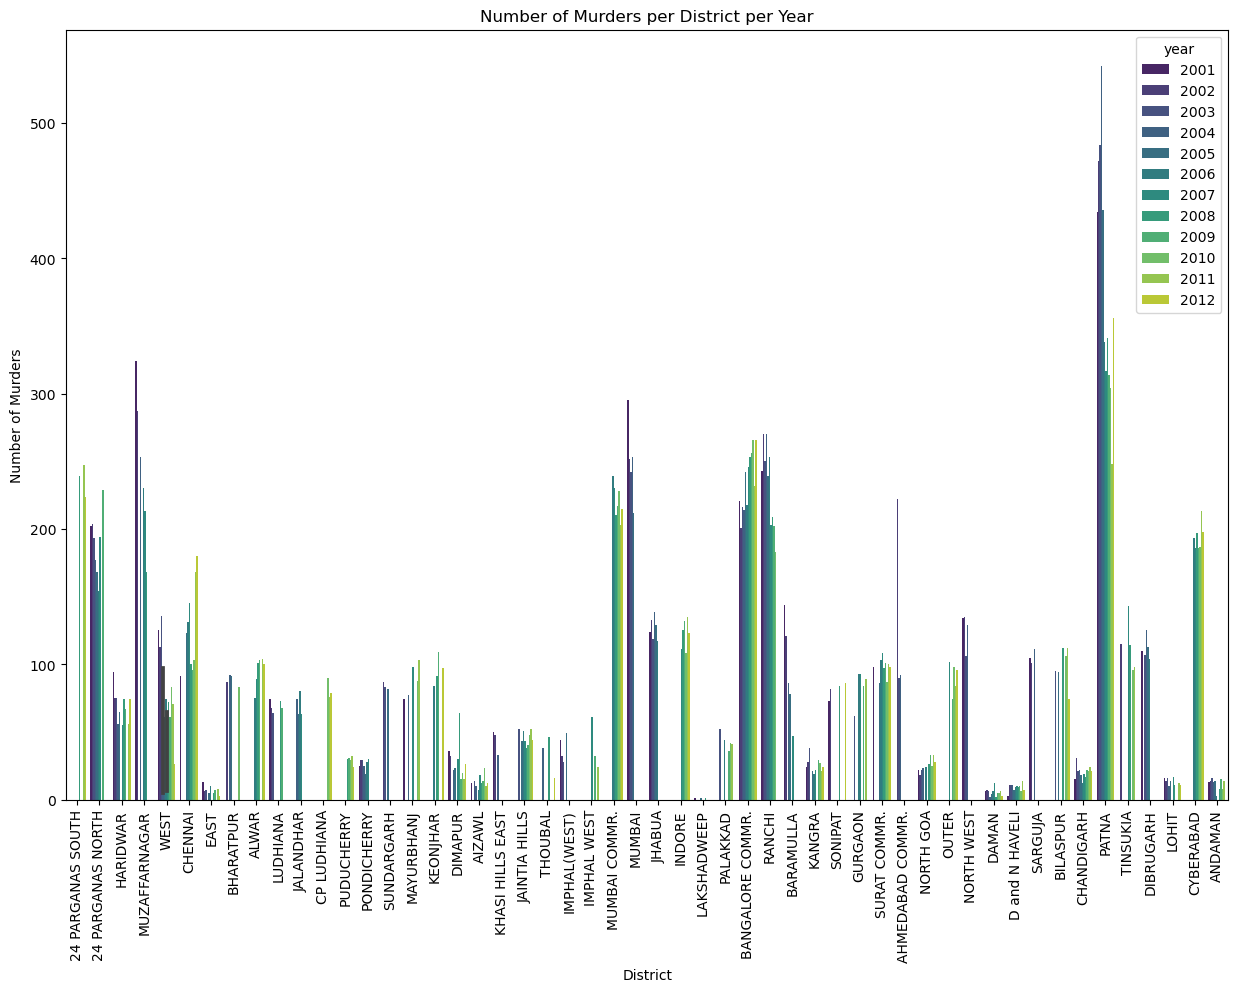

In [35]:
# Set the plot style
#plt.style.use('seaborn-bright')

# Bar plot for the number of murders per district per year
plt.figure(figsize=(15, 10))
sns.barplot(x='district', y='murder', hue='year', data=df_sorted, palette='viridis')
plt.title('Number of Murders per District per Year')
plt.xlabel('District')
plt.ylabel('Number of Murders')
plt.xticks(rotation=90)
#plt.legend(title='Year')
#plt.tight_layout()
plt.show()


##### From above BarPlot its clear that Patna has highest cases of Murders and EAST GODAVARI,Daman ,Lohit,andaman Dand Haveli, Aizawal district has less murder cases

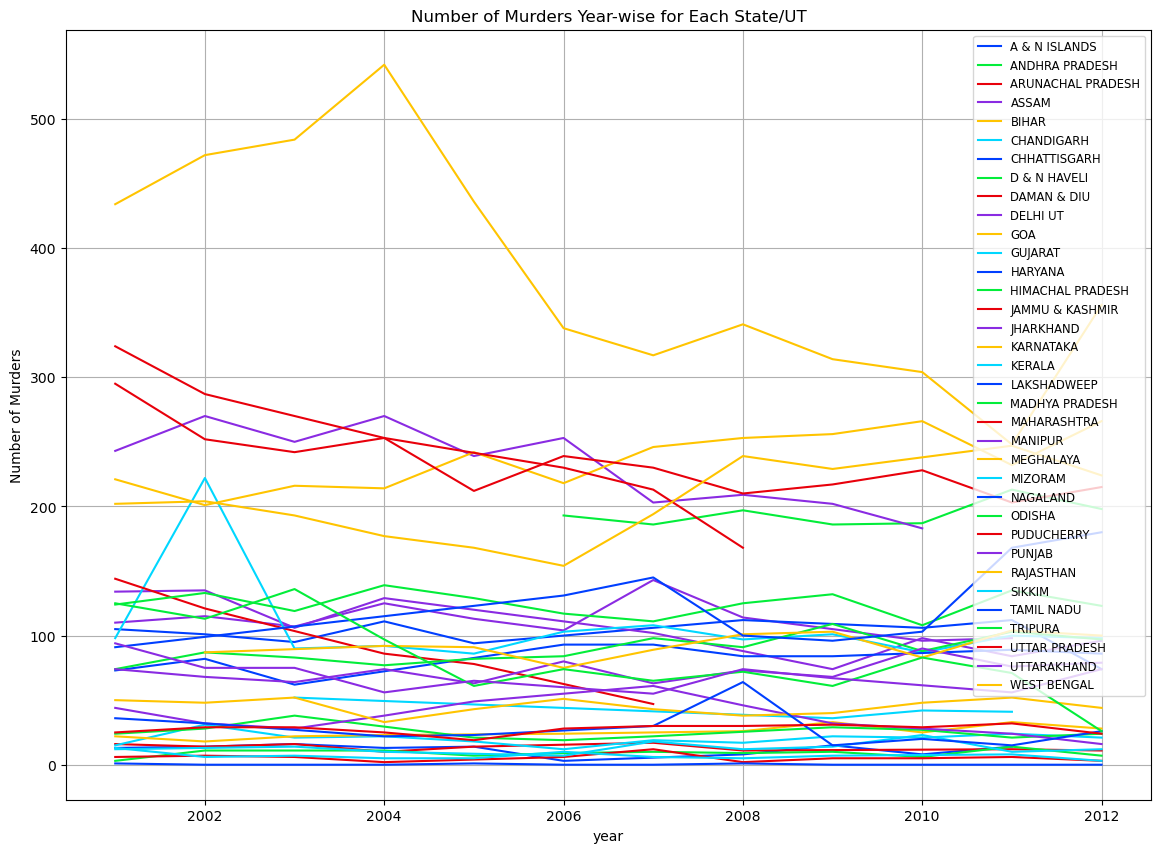

In [49]:
murders_by_state_year = df_sorted.groupby(['state', 'year'])['murder'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 10))

# Iterate over each state and plot the murders year-wise
for state, data in murders_by_state_year.groupby('state'):
    plt.plot(data['year'], data['murder'], label=state)

plt.xlabel('year')
plt.ylabel('Number of Murders')
plt.title('Number of Murders Year-wise for Each State/UT')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()
